In [13]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.externals import joblib

In [14]:
data = pd.read_csv("fashion-mnist_train.csv")
X = np.array(data.drop(['label'],1))
y = np.array(data['label'])
feat_cols = ['pixel' + str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns = feat_cols)
df['Label'] = y
df['Label'] = df['Label'].apply(lambda i:str(i))
rndperm = np.random.permutation(df.shape[0])
n_sne = 1000

In [15]:
n_sne = 1000
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 30, learning_rate = 200,n_iter = 20000)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x_tsne'] = tsne_results[:,0]
df_tsne['y_tsne'] = tsne_results[:,1]
df_tsne['Label'] = (df_tsne['Label']).astype(int)

joblib.dump(df.loc[rndperm[:n_sne],feat_cols].values, 'tsnedata.pkl')
joblib.dump(df_tsne['Label'], 'tsnelabel.pkl')
joblib.dump(df_tsne['x_tsne'], 'xtsne.pkl')
joblib.dump(df_tsne['y_tsne'], 'ytsne.pkl')

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 517.359431
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.166989
[t-SNE] Error after 325 iterations: 1.166989


['ytsne.pkl']

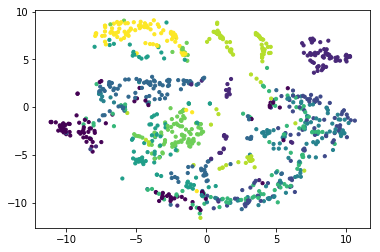

In [10]:
%matplotlib inline
plt.scatter(tsne_results[:,0],tsne_results[:,1],10,df_tsne['Label'])
plt.show()